# MCMC methods for parameter estimation

## Notes from the readings
### Statistical methods in cosmology
- Frequentists define probability as the limit for the number of independent trials going to infinity. Bayesians interpret probabilities as degree of belief in a Hypothesis. Frequentists only consider probability distributions of events while Bayesians consider hypothesis as events
- data gathering is an expensive and hard task: statistical techniques make possible to make the most of the data
- always beware of systematic effects
- an incorrect treatment of the data will give non-sensical results
- there will always be things that are beyond the statistical power of a given data set

### Metropolis-Hasting Algorithm
The likelihood function for fitting the data points:

$$y\left(x\right)=m$$
$$\chi^2\left(\Theta\right)=\sum_{i=0}^N\left(m-y_i\right)^2$$
$$P\left(D\mid\Theta\right)=\exp\left(-\sum_{i=0}^N\left(m-y_i\right)^2\right)$$

## What is the universe made of?

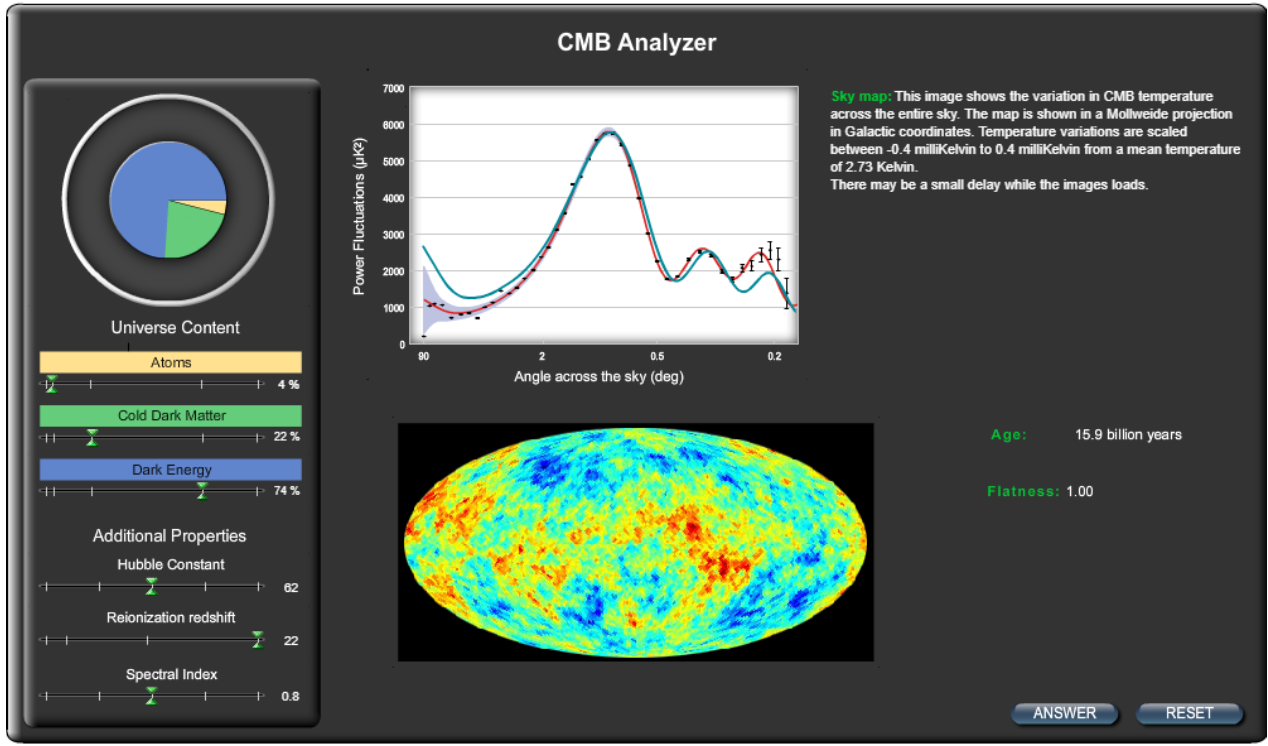

In [11]:
from PIL import Image
Image.open('CMB.png')

## What is the protactinium half-decay?
Proctatinium is a radioactive isotope that decays exponentially with time, whose available quantity at a given instant in time follows:
$$N\left(t\right)=N_0\exp\left(-\lambda t\right)$$

In [12]:
import pandas as pd
import numpy as np
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Computer Modern']})
rc('text', usetex=True)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from scipy import optimize

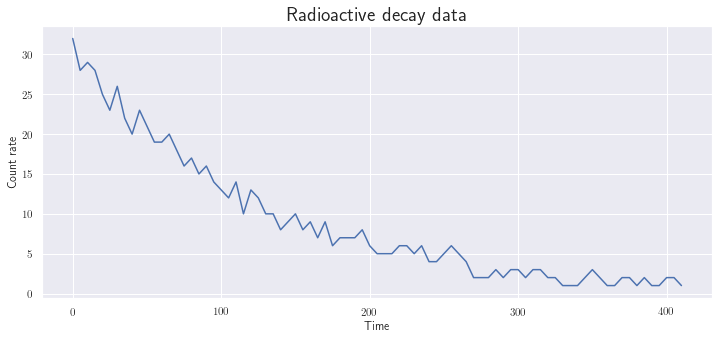

In [13]:
link = '''https://gist.githubusercontent.com/raquelhr/d1324510056353feeccf111d6b186a0d/raw/\
7b3bccc7917f3baa7ec1d919195d120083ee75e9/proctatinium_data.csv'''
data = pd.read_csv(link)
t_values = np.array(data["time"], dtype=float)
count_values = np.array(data["count_rate"], dtype=float)

plt.figure(figsize=(12,5))
plt.plot(t_values, count_values)
plt.title('Radioactive decay data', fontsize=20)
plt.xlabel('Time'); plt.ylabel('Count rate')
plt.show()

In [14]:
opt_parm, λ = [], 1
N = lambda t,λ: 32 * np.exp(-λ*t)

for _ in range(10**4):
    data['sim_count{}'.format(_)] = data.count_rate + np.random.normal(0, 1)
    opt_parm.append(optimize.curve_fit(N, data.time, data['sim_count{}'.format(_)])[0][0])

C:\Users\Taha\Anaconda3\Anaconda4\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


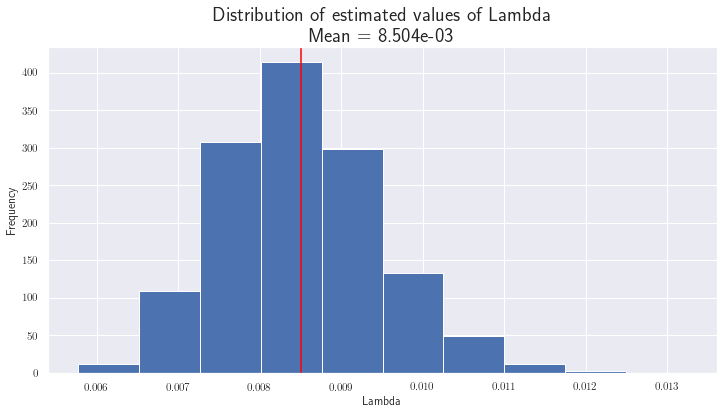

In [15]:
plt.figure(figsize=(12, 6))
plt.title('Distribution of estimated values of Lambda\nMean = {:.3e}'\
          .format(np.mean(opt_parm)), fontsize=20)
plt.hist(opt_parm, density=True)
plt.axvline(np.mean(opt_parm), color='red')
plt.xlabel('Lambda'); plt.ylabel('Frequency')
plt.show()

In [21]:
# Theoritical half-life of proctatinium: 1.17 minutes OR 70.2 seconds
exp_half_life = (np.log(2) / np.mean(opt_parm))
print('Theoritical half-life: ', 70.2,
      '\nExperimental half-life: ', round(exp_half_life, 3),
      '\nError (in seconds): ', round(abs(exp_half_life - 70.2), 3))

Theoritical half-life:  70.2 
Experimental half-life:  81.508 
Error (in seconds):  11.308
